<a href="https://colab.research.google.com/github/danielbenhur/NEADES_daniel/blob/main/bib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("bibliometrix") # Baixar o pacote. Só precisa fazer isso uma vez! E demora muito, por vezes muitos minutos!

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘promises’, ‘car’, ‘httpuv’, ‘DT’, ‘FactoMineR’, ‘plotly’, ‘pubmedR’, ‘shiny’, ‘tidytext’




In [1]:
library(bibliometrix) # carregar o pacote na memória para utilizá-lo agora.

Please note that our software is open source and available for use, distributed under the MIT license.
When it is used in a publication, we ask that authors properly cite the following reference:

Aria, M. & Cuccurullo, C. (2017) bibliometrix: An R-tool for comprehensive science mapping analysis, 
                        Journal of Informetrics, 11(4), pp 959-975, Elsevier.

Failure to properly cite the software is considered a violation of the license.
                        
For information and bug reports:
                        - Take a look at https://www.bibliometrix.org
                        - Send an email to info@bibliometrix.org   
                        - Write a post on https://github.com/massimoaria/bibliometrix/issues
                        
Help us to keep Bibliometrix and Biblioshiny free to download and use by contributing with a small donation to support our research team (https://bibliometrix.org/donate.html)

                        
To start with the Bibliosh

In [2]:
# Dúvidas de uso do Bibliometrix, execute  o comando que segue:
help(bibliometrix)

In [31]:
############### ETAPA 1 - CARREGAMENTO E CONVERSÃO DOS DADOS ###############

In [ ]:
# Carregue os arquivos "*.bib" no disco
# No caso da atual pesquisa, as seguintes strigns foram utilizadas:
#SCOPUS: TITLE-ABS-KEY(("Water *Security" OR "*Segurança Hídrica") AND
#        ("Brazil*" OR "Brasil*")) AND LANGUAGE(portuguese OR english)
#ISI: TS=(("Water *Security" OR "*Segurança Hídrica") AND
#        ("Brazil*" OR "Brasil*")) AND LA=("Portuguese" OR "English")

In [ ]:
# WEB OF SCIENCE (ISI): Converter os dados para o padrão do bibliometrix
A <- convert2df("/content/savedrecs.bib", dbsource = "isi", format = "bibtex")

# SCOPUS: Converter os dados   para o padrão do bibliometrix
B <- convert2df("/content/scopus.bib", dbsource = "scopus", format = "bibtex")

# PUBMED: Se desejar caregar dado, execute o script do PubMed, gerando o arquivo de dados "C"

# COCHRANE: Se desejar carregar dados  execute a linha que segue, gerando o arquivo de dados "D"
# D <- convert2df("c:/bib/citation-export.bib", dbsource = "isi", format = "bibtex")

In [4]:
#### Juntar bases WEB OF SCIENCE (ISI), SCOPUS, PUBMED e COCHRANE
M <- mergeDbSources(A, B, remove.duplicated = TRUE)
# se precisar juntar dados do Pubmed e Cochrane, execute linha que segue
# M <- mergeDbSources(A, B, C, D, remove.duplicated = TRUE)


 30 duplicated documents have been removed


In [5]:
#### Cria um arquivo.csv para importar para o Excel
P<- M[,c("AU","TI","SO","AB","DE","ID", "DI", "LA","DT", "TC","PY","SN")]  # Cria lista na ordem desejada
write.table(P, "/content/artigos.csv", sep="|", row.names=FALSE) # para gerar com separador ";", sem necessidade de ajustar o CSV, quanto à primeira coluna

In [6]:
#### BiblioAnalysis - Processamento dos dados
resultados <- biblioAnalysis(M)

In [21]:
############### ETAPA 2 - ANÁLISE e VISUALIZAÇÃO DOS DADOS ###############

#### 2.1 - Resumo dos resultados na console do RStudio
Resumo <- summary(object = resultados, k = 10)



MAIN INFORMATION ABOUT DATA

 Timespan                              2007 : 2023 
 Sources (Journals, Books, etc)        118 
 Documents                             202 
 Annual Growth Rate %                  15.48 
 Document Average Age                  3.05 
 Average citations per doc             7.45 
 Average citations per year per doc    1.614 
 References                            2506 
 
DOCUMENT TYPES                     
 article                    175 
 article article            1 
 article; early access      2 
 book                       3 
 book chapter               10 
 conference paper           4 
 conference review          2 
 editorial                  1 
 proceedings paper          1 
 review                     3 
 
DOCUMENT CONTENTS
 Keywords Plus (ID)                    1266 
 Author's Keywords (DE)                583 
 
AUTHORS
 Authors                               807 
 Author Appearances                    1009 
 Authors of single-authored docs       13 


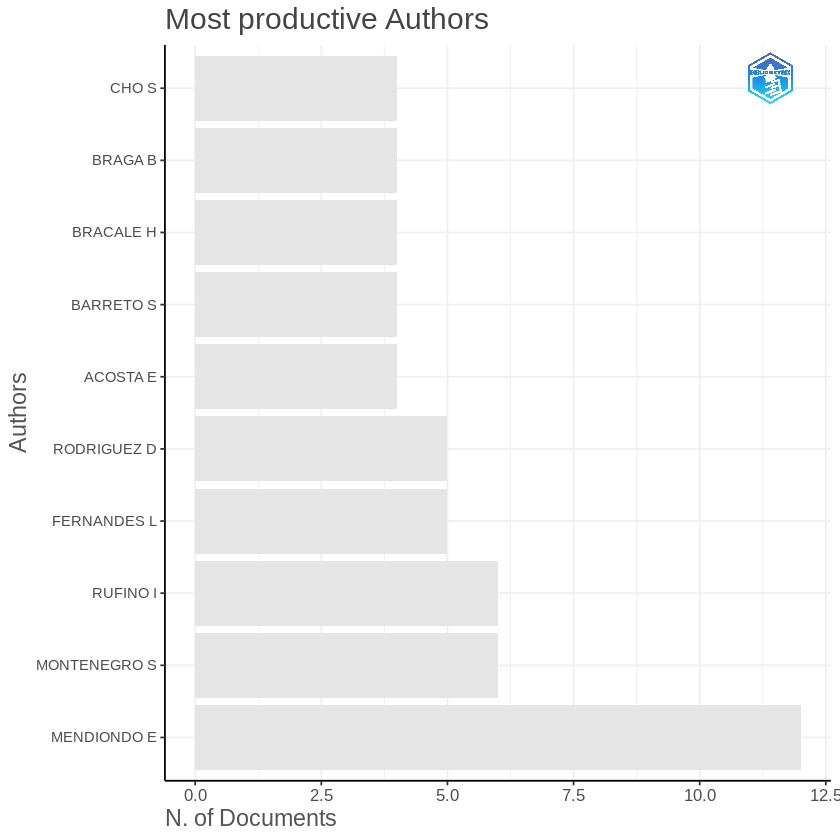

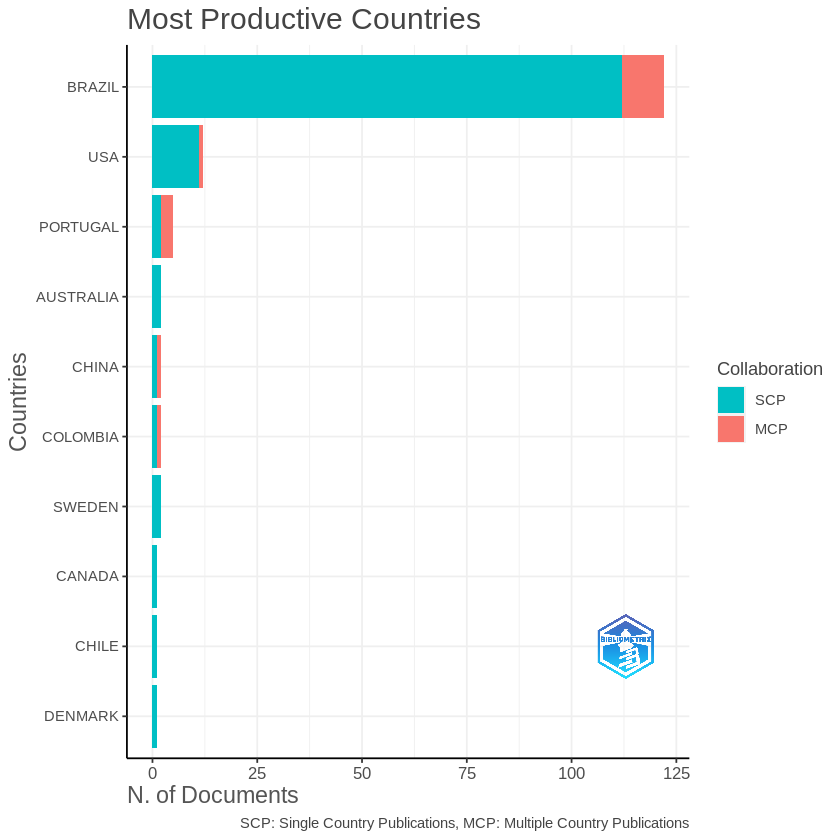

Warning message:
“Removed 1 rows containing non-finite values (`stat_align()`).”


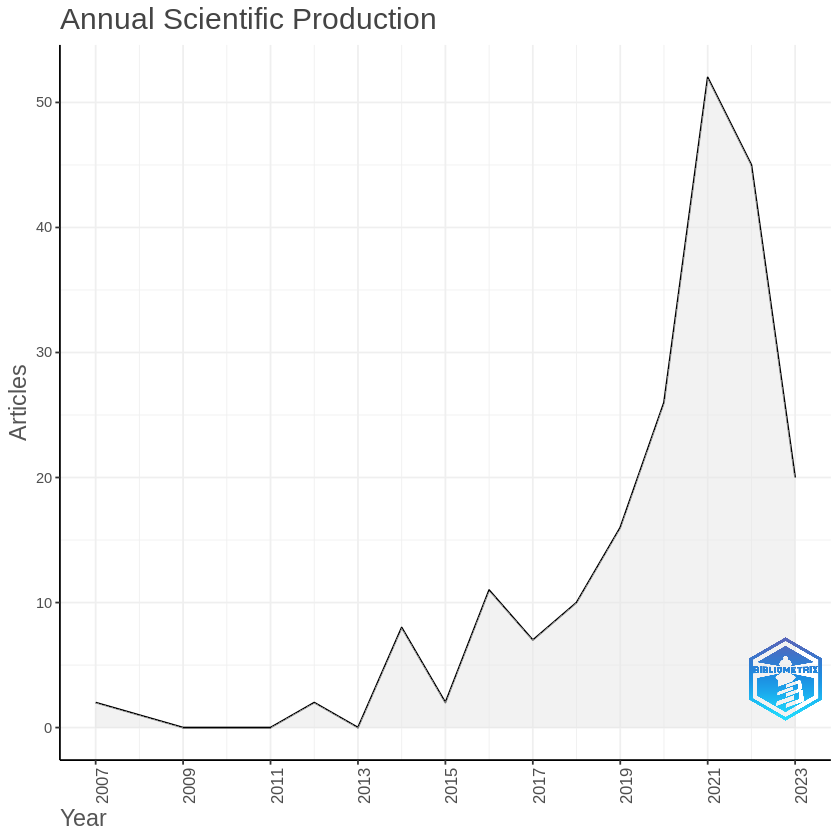

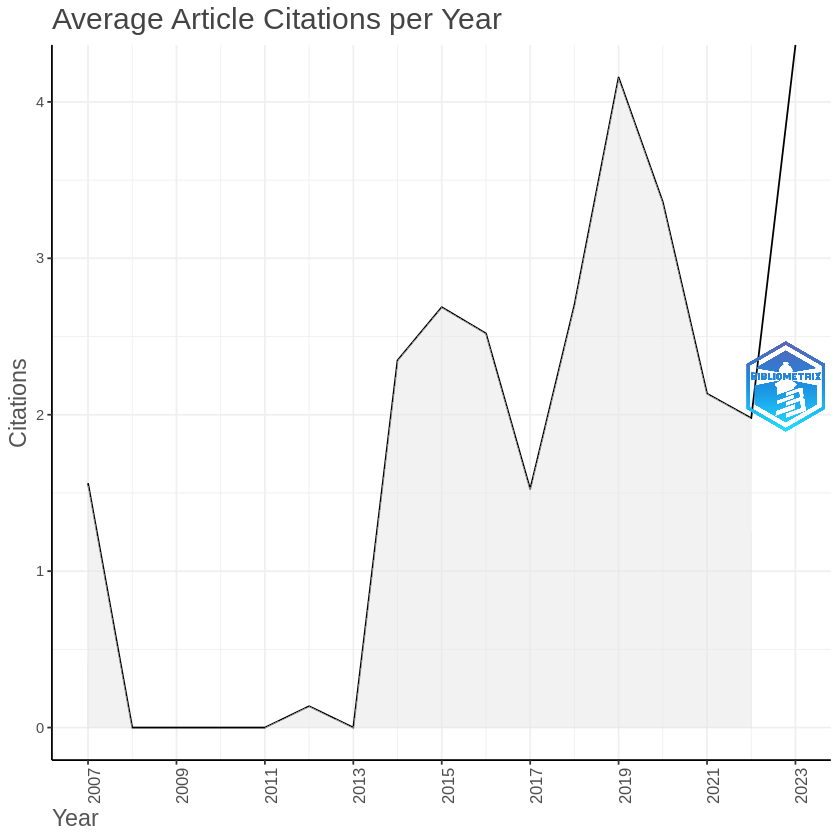

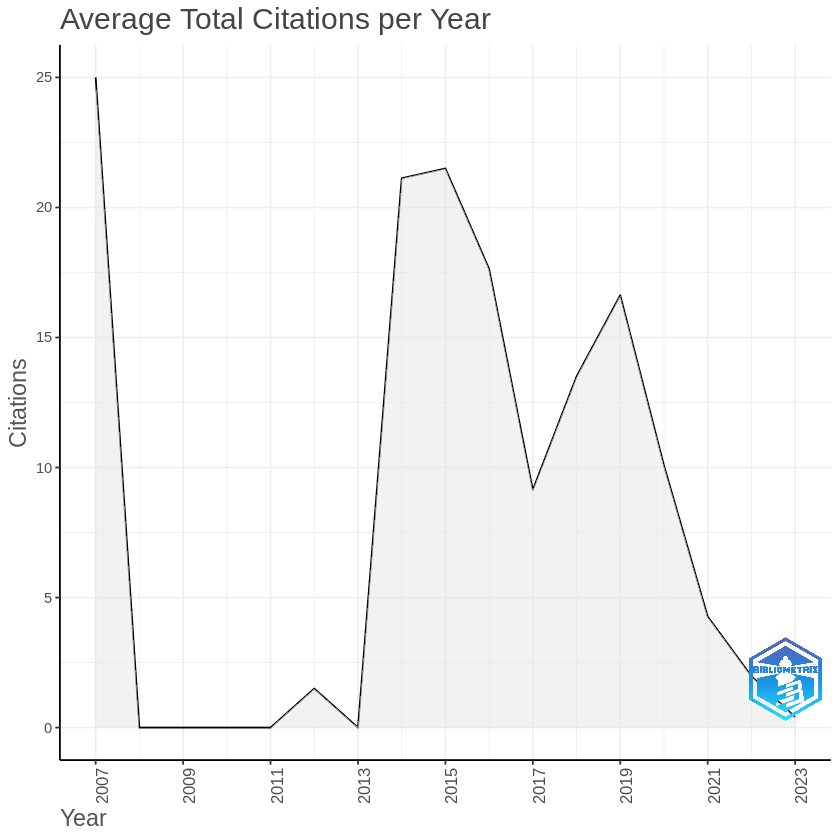

In [7]:
plot(resultados, k=10)   # Gráficos com dados bibliométricos básicos

In [9]:
# Para visualizar os resultados via web-interface (browser)
biblioshiny()

#### Para mais informações, tutoriais e vídeos, acessar www.bibliometrix.org/

Loading required package: shiny


Listening on http://127.0.0.1:5595

